In [1]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    
import datetime

In [28]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    result = pd.DataFrame()
    files_to_be_read = glob.glob(os.path.join(folderpath, filename_pattern))
    for i in xrange(len(files_to_be_read)):
        try:
            df = pd.read_csv(files_to_be_read[i])
            result = result.append(df)
        except Exception as e:
            pass
    return result


### Read Data

In [29]:
#base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'
base_folderpath = '/home/tarciso/workspace/trips-optimality-exp/data/'

#### Trips Improvement Capacity Data

In [30]:
#imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
imp_cap_df = read_df_from_csv_folder(base_folderpath + '/dur_imp_cap_2017_06_24/', 'part-*.csv')

In [31]:
imp_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 2
Data columns (total 7 columns):
date                 3082 non-null object
user_trip_id         3082 non-null int64
itinerary_id         3082 non-null int64
duration             3082 non-null float64
o_datetime           3082 non-null object
executed_duration    3082 non-null float64
imp_capacity         3082 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 192.6+ KB


In [27]:
imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity
0,2017-06-20,137438953516,2,7.050000,2017-06-20 16:18:29,6.400000,-0.650000
1,2017-06-20,755914244098,2,7.850000,2017-06-20 06:25:20,102.966667,95.116667
2,2017-06-20,1262720385026,2,7.233333,2017-06-20 07:13:10,4.016667,-3.216667
3,2017-06-20,1614907703311,2,4.800000,2017-06-20 17:06:27,0.950000,-3.850000
4,2017-06-20,1666447311000,2,5.700000,2017-06-20 12:41:40,0.883333,-4.816667


In [32]:
imp_cap_df.count()

date                 3082
user_trip_id         3082
itinerary_id         3082
duration             3082
o_datetime           3082
executed_duration    3082
imp_capacity         3082
dtype: int64

#### Trips Itinerary Data

In [33]:
#trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [34]:
#trips_itineraries.columns

In [35]:
#trips_itineraries.describe()

In [36]:
#trips_itineraries.head(10)

### Analyzing Data Distribution

#### Overall

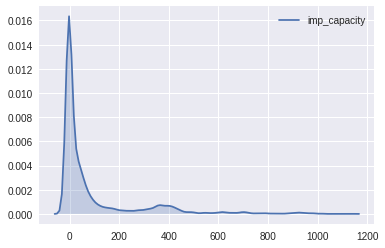

In [37]:
sns.kdeplot(imp_cap_df.imp_capacity, shade=True)

In [38]:
imp_cap_df.imp_capacity.describe()

count    3082.000000
mean       87.693230
std       175.581210
min       -24.883333
25%        -3.800000
50%         9.175000
75%        71.212500
max      1131.750000
Name: imp_capacity, dtype: float64

#### Removing outliers (lower/higher 5%)

In [39]:
fith_perc = np.percentile(imp_cap_df.imp_capacity,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity,95)

print fith_perc, ninety_fith_perc

-10.2166666667 437.609166667


In [40]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity > fith_perc) & (imp_cap_df.imp_capacity < ninety_fith_perc)].copy()

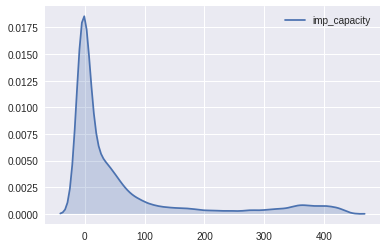

In [41]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity, shade=True)

In [42]:
filtered_imp_cap_df.imp_capacity.describe()

count    2771.000000
mean       61.024101
std       111.981742
min       -10.200000
25%        -3.433333
50%         9.183333
75%        60.766667
max       437.150000
Name: imp_capacity, dtype: float64

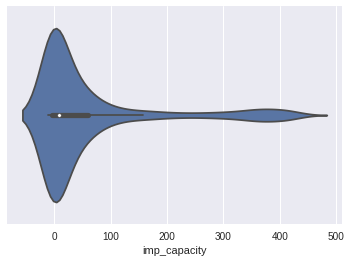

In [43]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity)

#### Per Hour of Day

In [44]:
filtered_imp_cap_df['hour_of_day'] = pd.to_datetime(filtered_imp_cap_df['o_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [45]:
filtered_imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day
0,2017-06-20,137438953516,2,7.050000,2017-06-20 16:18:29,6.400000,-0.650000,16
1,2017-06-20,755914244098,2,7.850000,2017-06-20 06:25:20,102.966667,95.116667,6
2,2017-06-20,1262720385026,2,7.233333,2017-06-20 07:13:10,4.016667,-3.216667,7
3,2017-06-20,1614907703311,2,4.800000,2017-06-20 17:06:27,0.950000,-3.850000,17
4,2017-06-20,1666447311000,2,5.700000,2017-06-20 12:41:40,0.883333,-4.816667,12


In [46]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

,hour_of_day,period_of_day
0,0,very_late_night
1,1,very_late_night
2,2,very_late_night
3,3,very_late_night
4,4,early_morning
5,5,early_morning
6,6,early_morning
7,7,morning
8,8,morning
9,9,morning


In [47]:
imp_period_of_day = filtered_imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

In [48]:
imp_period_of_day.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day,period_of_day
0,2017-06-20,137438953516,2,7.050000,2017-06-20 16:18:29,6.400000,-0.650000,16,afternoon
1,2017-06-21,738734374985,1,8.800000,2017-06-21 16:52:33,53.316667,44.516667,16,afternoon
2,2017-06-23,609885356119,1,21.800000,2017-06-23 16:04:11,230.833333,209.033333,16,afternoon
3,2017-06-19,609885356128,1,7.183333,2017-06-19 16:34:52,1.166667,-6.016667,16,afternoon
4,2017-06-22,94489280602,1,12.166667,2017-06-22 16:05:04,4.216667,-7.950000,16,afternoon


/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:2053: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


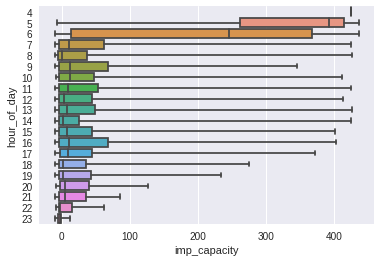

In [50]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity, y=filtered_imp_cap_df.hour_of_day, data=filtered_imp_cap_df, 
            whis=np.inf, orient='h')

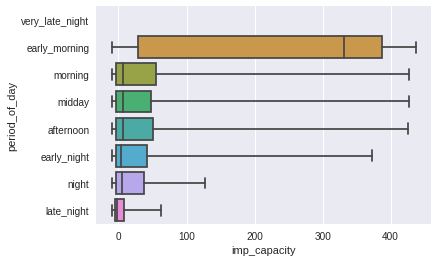

In [52]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.boxplot(x=imp_period_of_day.imp_capacity, y=imp_period_of_day.period_of_day, data=imp_period_of_day,
            order=col_order,whis=np.inf)

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)